
<a href="https://colab.research.google.com/github/pr0fez/AI23-Deep_learning/blob/main/Exercises/E0-MLP.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Multilayered perceptron (MLP) exercises 

---
These are introductory exercises in Deep learning with focus in **MLP** for regression and classification.

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. MLP for regression (*)

We will continue with the dataset that we used in the lecture with predicting miles per gallons using an MLP for regression.

&nbsp; a) Load the mpg dataset using seaborn. (*)

&nbsp; b) Use your data analysis skills to perform EDA. (*)

&nbsp; c) Find out the missing values in the dataset and use a machine learning model to fill them in (imputation). (**)

&nbsp; d) Can you figure out a way to see if the values filled in are reasonable? (**)

&nbsp; e) Do a train|val|test split on the data and scale it properly. Test out which scaling method to use. (*)

&nbsp; f) Create an MLP with hidden layers, 1-3, and test out different amount of nodes. Choose the number of epochs you want to use throughout all experiments. Plot training losses and validation losses for different configurations. (*)

&nbsp; g) Now use early stopping to tune the number of epochs. (*)

&nbsp; h) Train on all training data and validation data. (*)

&nbsp; i) Predict on test data and evaluate. (*)

&nbsp; j) Can you create an MLP model that beats random forest for this dataset? (**)

<details>

<summary>Hint</summary>

d) Perhaps some statistical analysis and visual comparison of similar samples? Also combine with domain skills. 

f) Decide how to do systematic testing and document them.

j) Don't forget about classical machine learning models that we learned in the last course, in many cases they can outperform neural networks. You need to pick the right model for the right problem.

</details>

<details>

<summary>Answer</summary>

No answers here, discuss with your fellow data scientists to move forward if you're stuck.


</details>

---

## 1. MLP for classification (**)

Use the heart dataset that you worked with in the lab in Machine learning course and train an MLP on it. Gather your knowledge of MLP from the lecture and from the previous exercise to try and see if you can outperform your previous model. Note that an important part is to perform systematic scientific experimentation. 

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---

In [314]:
import keras
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split    


In [315]:
# mpg dataset from seaborn
from seaborn import load_dataset
mpg = load_dataset('mpg')


In [316]:
# find out missing values
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [317]:
mpg.query('horsepower.isnull()')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [318]:
# save all the indexies there missing values
# missing_values = mpg[mpg.isnull().any(axis=1)].index

# mpg.loc[missing_values]
# mpg['horsepower'] = mpg['horsepower'].fillna(mpg['horsepower'].mean())
# mpg.loc[missing_values]
# mpg = mpg.drop(['name', 'origin'], axis=1)


In [319]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [320]:
df = mpg

In [321]:
df = df.drop(['name'], axis=1)

In [322]:
df.dropna(inplace=True, axis=0)

In [323]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


<Axes: xlabel='model_year'>

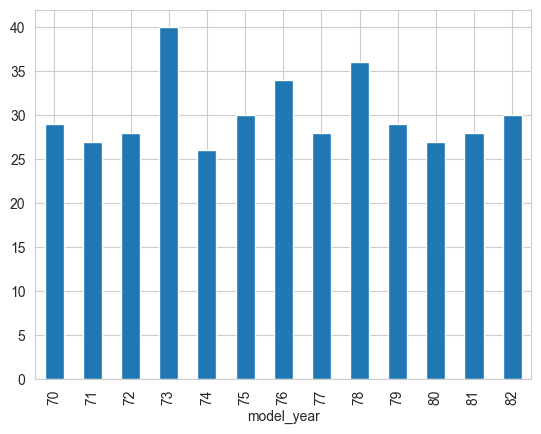

In [324]:
df['model_year'].value_counts().sort_index().plot(kind='bar')

In [325]:
import pandas as pd
bins = pd.IntervalIndex.from_tuples([(69, 73), (74, 77), (78, 82)])

bins

df["model_year"] = pd.cut(df["model_year"], bins=bins)

In [326]:
df = pd.get_dummies(df, columns=['model_year', 'origin'], drop_first=True)

In [327]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,"model_year_(74, 77]","model_year_(78, 82]",origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,False,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,False,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,False,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,False,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,False,True,False,True
394,44.0,4,97.0,52.0,2130,24.6,False,True,False,False
395,32.0,4,135.0,84.0,2295,11.6,False,True,False,True
396,28.0,4,120.0,79.0,2625,18.6,False,True,False,True


In [328]:
from sklearn.preprocessing import StandardScaler

In [329]:
# train test split

X, y = df.drop('mpg', axis=1).values, df['mpg'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)  
scaled_X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((274, 9), (118, 9))

In [330]:
scaled_X_train.max()

3.2869431314281545

In [331]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(scaled_X_train, y_train)

intercept, coef = model_lr.intercept_, model_lr.coef_

In [332]:
import keras
from keras import layers
from keras.optimizers import SGD
inputs = keras.Input(shape=(scaled_X_train.shape[1],), name = "Input_layer")
outputs = layers.Dense(1, name='Output_layer')(inputs)

model_shallow = keras.Model(inputs=inputs, outputs=outputs)

model_shallow.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01))
model_shallow.summary()

Model: "functional_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (InputLayer)        │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [333]:
model_shallow.fit(scaled_X_train, y_train, epochs=50, verbose=0,
                  validation_data=(scaled_X_test, y_test))

<Axes: title={'center': 'Training loss and test loss'}, xlabel='Epochs', ylabel='Loss'>

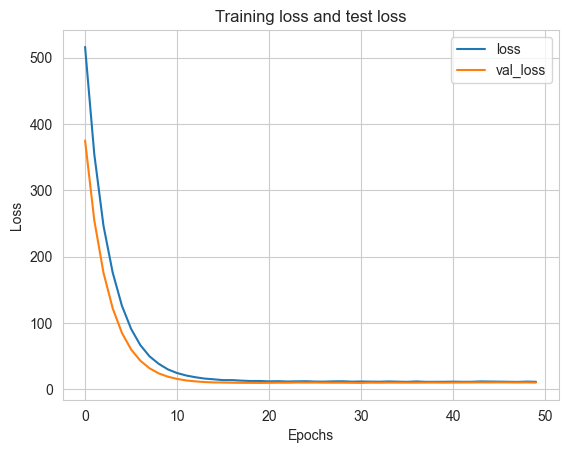

In [334]:
pd.DataFrame(model_shallow.history.history).plot(xlabel="Epochs",
                                                 ylabel="Loss", title="Training loss and test loss")
# this result shows no overfitting as both training loss and validation loss converges

In [335]:
weights, bias = model_shallow.layers[1].get_weights()
weights, coef

(array([[-0.45673946],
        [-0.48460266],
        [-1.4386628 ],
        [-3.222858  ],
        [-0.26152322],
        [ 0.27780306],
        [ 2.6542892 ],
        [ 0.18058312],
        [-0.95200837]], dtype=float32),
 array([-0.07963534,  0.71698622, -1.5802261 , -4.49219087, -0.08849455,
         0.36793355,  2.76523073,  0.02957218, -1.25074873]))

In [336]:
bias, intercept

(array([23.64181], dtype=float32), 23.637591240875913)

In [337]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


def evaluate_regression(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return mse, mae, rmse

y_pred_NN = model_shallow.predict(scaled_X_test)

y_pred_lr = model_lr.predict(scaled_X_test)

score = {model: evaluate_regression(y_test, y_pred) for model, y_pred in zip(['NN', 'LR'], [y_pred_NN, y_pred_lr])}

df_score = pd.DataFrame(score, index=['MSE', 'MAE', 'RMSE'])

df_score["RMSE_prop"] = df_score.loc["RMSE"] / y_test.mean()

df_score

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


,NN,LR,RMSE_prop
MSE,9.842776,9.742016,NaN
MAE,2.497608,2.522334,NaN
RMSE,3.137320,3.121220,NaN


# ------------------- FEl uppe 

# Classisfication

In [338]:
from sklearn.datasets import load_breast_cancer
import seaborn as sns   

sns.set_style(style='whitegrid')

raw_data = load_breast_cancer()
X, y = raw_data.data, raw_data.target

np.isnan(X).sum()



0

In [339]:
X.shape, y.shape

((569, 30), (569,))

In [340]:
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

scaled_X_train_val = scaler.fit_transform(X_train_val)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

scaled_X_train = scaler.transform(X_train)


In [341]:
model = keras.Sequential(name='classifier')
model.add(layers.Input(shape=(X.shape[1],), name='Input'))
model.add(layers.Dense(30, name="Layer_1", activation='relu'))
model.add(layers.Dense(30, name="Layer_2", activation='relu'))
model.add(layers.Dense(1, name="Output_layer", activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer_1 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_2 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,891 (7.39 KB)

 Trainable params: 1,891 (7.39 KB)

 Non-trainable params: 0 (0.00 B)

In [342]:
model.fit(scaled_X_train_val, y_train_val, epochs=1000, verbose=0, validation_data=(scaled_X_val, y_val))

<Axes: title={'center': 'Training loss and validation loss'}, xlabel='Epochs', ylabel='Loss'>

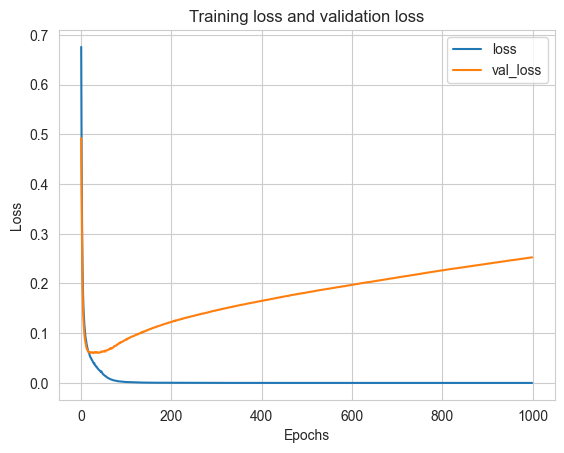

In [343]:
#plot olny loss and validation loss
pd.DataFrame(model.history.history).plot(xlabel="Epochs", ylabel="Loss", title="Training loss and validation loss")

# pd.DataFrame(model.history.history).plot(xlabel="Epochs", ylabel="Loss", title="Training loss and validation loss")

In [344]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=15, mode='min')

model = keras.Sequential(name='classifier')
model.add(layers.Input(shape=(X.shape[1],), name='Input'))
model.add(layers.Dense(30, name="Layer_1", activation='relu'))
model.add(layers.Dense(30, name="Layer_2", activation='relu'))
model.add(layers.Dense(1, name="Output_layer", activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(scaled_X_train_val, y_train_val, epochs=1000, verbose=1, validation_data=(scaled_X_val, y_val), callbacks=[early_stopping])

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.5938 - val_loss: 0.4199
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3986 - val_loss: 0.2845
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2775 - val_loss: 0.2027
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2171 - val_loss: 0.1555
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1720 - val_loss: 0.1260
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1252 - val_loss: 0.1082
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1153 - val_loss: 0.0939
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1030 - val_loss: 0.0835
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0676 - val_loss: 0.0766
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0923 - val_loss: 0.0707
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0660 - val_loss: 0.0658
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/s

<Axes: title={'center': 'Training loss and validation loss'}, xlabel='Epochs', ylabel='Loss'>

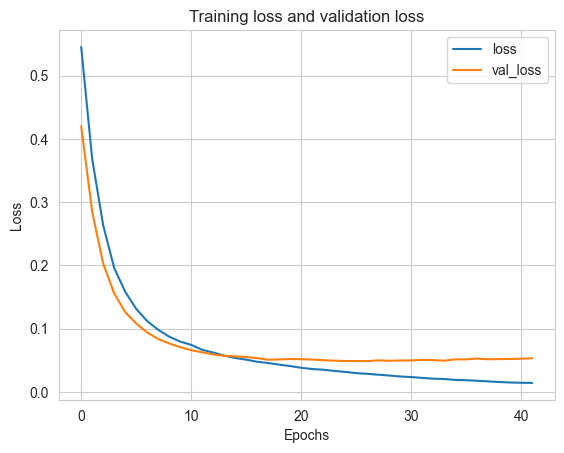

In [345]:
df_loss = pd.DataFrame(model.history.history)
df_loss.plot(xlabel="Epochs", ylabel="Loss", title="Training loss and validation loss")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


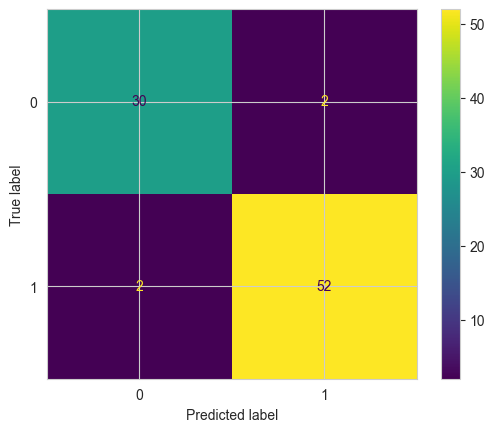

In [346]:
from sklearn.metrics import accuracy_score, confusion_matrix, confusion_matrix, classification_report, ConfusionMatrixDisplay

model = keras.Sequential(name='classifier')
model.add(layers.Input(shape=(X.shape[1],), name='Input'))
model.add(layers.Dense(30, name="Layer_1", activation='relu'))
model.add(layers.Dense(30, name="Layer_2", activation='relu'))
model.add(layers.Dense(1, name="Output_layer", activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')



model.fit(scaled_X_train, y_train, epochs=len(df_loss), verbose=0, validation_data=(scaled_X_test, y_test), callbacks=[early_stopping])

final_loss = pd.DataFrame(model.history.history)
y_pred = model.predict(scaled_X_test)
y_pred = np.round(y_pred)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()   